In [18]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# For classification performance metrics
from sklearn.metrics import classification_report, confusion_matrix 

## images resized to 128 * 128, normalized, without masks

In [ ]:
""" # define paths
base_path = r"..\\data\\"
#base_path_in = os.path.join(base_path, "processed", "extracted")   # path to read from the *.npy files
base_path_in = os.path.join(base_path, "processed")   # path to read from the *.npy files

train_npy_file = 'train_data_resized_without_masks.npz'
test_npy_file  = 'test_data_resized_without_masks.npz'

#train data
train = np.load(os.path.join(base_path_in, train_npy_file), allow_pickle=True)
X_train = train['X_train']
y_train = train['y_train']

# test data
test = np.load(os.path.join(base_path_in, test_npy_file), allow_pickle=True)
X_test = test['X_test']
y_test = test['y_test']
 """

In [ ]:
""" print(len(y_train))
print(len(X_train))

print(len(y_test))
print(len(X_test)) """

35059
35059
4233
4233


## images resized to 128 * 128, normalized, with masks (incl. Gaussian Blur, Clahe)

In [ ]:
""" # define paths
base_path = r"..\\data\\"
#base_path_in = os.path.join(base_path, "processed", "extracted")   # path to read from the *.npy files
base_path_in = os.path.join(base_path, "processed")   # path to read from the *.npy files

train_npy_file = 'train_data_resized_with_masks.npz'
test_npy_file  = 'test_data_resized_with_masks.npz'

#train data
train = np.load(os.path.join(base_path_in, train_npy_file), allow_pickle=True)
X_train = train['X_train']
y_train = train['y_train']

# test data
test = np.load(os.path.join(base_path_in, test_npy_file), allow_pickle=True)
X_test = test['X_test']
y_test = test['y_test'] """

In [ ]:
""" print(len(y_train))
print(len(X_train))

print(len(y_test))
print(len(X_test)) """

35059
35059
4233
4233


## images resized to 20 * 20, normalized, with masks (incl. Gaussian Blur, Clahe)

In [28]:
# define paths
base_path = r"..\\data\\"
#base_path_in = os.path.join(base_path, "processed", "extracted")   # path to read from the *.npy files
base_path_in = os.path.join(base_path, "processed")   # path to read from the *.npy files

train_npy_file = 'train_data_resized_with_masks_20_20.npz'
test_npy_file  = 'test_data_resized_with_masks_20_20.npz'

#train data
train = np.load(os.path.join(base_path_in, train_npy_file), allow_pickle=True)
X_train = train['X_train']
y_train = train['y_train']

# test data
test = np.load(os.path.join(base_path_in, test_npy_file), allow_pickle=True)
X_test = test['X_test']
y_test = test['y_test']

In [29]:
print(len(y_train))
print(len(X_train))

print(len(y_test))
print(len(X_test))

35059
35059
4233
4233


## feature extraction with HOG based on images original size 299 * 299, normalized, with masks (incl. Gaussian Blur, Clahe) and apllied masks

In [ ]:
""" # define paths
base_path = r"..\\data\\"
base_path_in = os.path.join(base_path, "processed", "extracted")   # path to read from the *.npy files

train_npy_file = 'hog_features.npy'
test_npy_file  = 'hog_features_test.npy'

train_labels_file = 'labels_test.npy'
test_labels_file = 'labels_train.npy'

#train data
X_train = np.load(os.path.join(base_path_in, train_npy_file))
y_train = np.load(os.path.join(base_path_in, train_labels_file))

# test data
X_test = np.load(os.path.join(base_path_in, test_npy_file))
y_test = np.load(os.path.join(base_path_in, test_labels_file))
 """

In [ ]:
""" print(len(y_train))
print(len(X_train))

print(len(y_test))
print(len(X_test)) """

4233
35059
35059
4233


## first try of modeling with SVM

In [42]:
# try slices of arrays too fasten fitting and set up code
num_subset = 15000

X_train = X_train[:num_subset,:]
y_train = y_train[:num_subset]

X_test = X_test[:num_subset,:]
y_test = y_test[:num_subset]


print(len(y_train))
print(len(X_train))

print(len(y_test))
print(len(X_test))

15000
15000
4233
4233


In [43]:
# sacling the data
scaler = StandardScaler()

# fit and transform train data 
X_train_scaled = scaler.fit_transform(X_train)

# fit test data
X_test_scaled = scaler.transform(X_test)

In [44]:
ds_y_train = pd.Series(y_train).astype("category")


In [ ]:
clf = SVC(gamma=0.01,  kernel='poly')
clf.fit(X_train_scaled, ds_y_train)


In [ ]:
model_path = r"..\\Models\\ML"

# 2. Save and load with joblib
import joblib
joblib.dump(clf, os.path.join(model_path, 'SVC_model_pixel20_20_images_all.joblib'), compress='gzip')

['..\\\\Models\\\\ML\\SVC_model_pixel20_20_images_all.joblib']

In [41]:
### optional:
# load model instead of fitting it again
clf_loaded = joblib.load(os.path.join(model_path), 'SVC_model_pixel20_20_images_all.joblib')

PermissionError: [Errno 13] Permission denied: '..\\\\Models\\\\ML'

In [37]:
# predict  from X_test_scaled
y_pred = clf.predict(X_test_scaled)

## Evaluation

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.52      0.49       723
           1       0.74      0.65      0.69      1203
           2       0.79      0.78      0.79      2038
           3       0.75      0.91      0.82       269

    accuracy                           0.71      4233
   macro avg       0.68      0.72      0.70      4233
weighted avg       0.72      0.71      0.71      4233



array([[ 378,  124,  204,   17],
       [ 204,  778,  202,   19],
       [ 250,  149, 1595,   44],
       [   3,    6,   15,  245]], dtype=int64)

<Axes: >

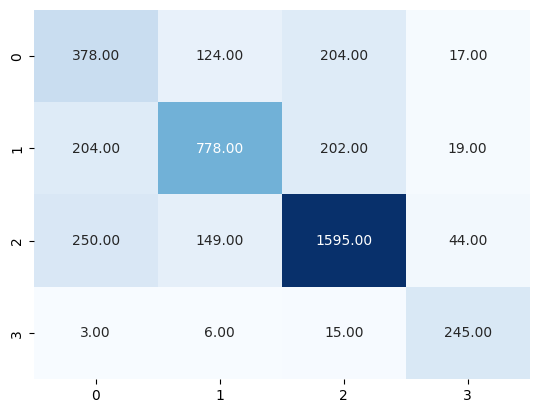

In [39]:
#cm = pd.crosstab(y_test, y_pred, rownames=['Real Class'], colnames=['Predicted Class'])

cm = confusion_matrix(y_test, y_pred)

display(cm)

sns.heatmap(cm, cmap='Blues', cbar=False, annot=True, fmt='.2f')


